# Pourbaix Diagrams
This code is used to used to create Pourbaix Diagrams with Matplotlib. Most of the calculations will be done by hand, though the code allows for some calculations to be done by the code. That said, this is mostly a plotting script. 

In [25]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Aluminum System

In [129]:
#Solvent boundary lines
pH = np.linspace(0,14,100)
BoundaryHH2 = -0.059*pH
BoundaryO2H2O = 1.29-0.059*pH

phAl2O3Al = np.linspace(4,8,100)
BoundaryAl2O3Al = -1.516-(6*0.059*phAl2O3Al)
FakeAl2O3Aly = np.linspace(-1.66, -2.5, 100)
FakeAl2O3Alx = np.linspace(4, 8, 100)



Text(0, 0.5, 'E(V)')

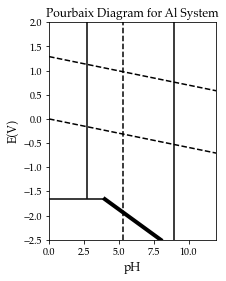

In [37]:
fig = plt.figure(figsize = (3,4))

#Axis limits
plt.xlim(-0,12)
plt.ylim(-2.5,2)

#All of the relevant boundary lines. Everything in this cell up to this point can be copied.
plt.plot(pH,BoundaryHH2, '--', color = 'black')
plt.plot(pH,BoundaryO2H2O, '--', color = 'black')
plt.plot(FakeAl2O3Alx,FakeAl2O3Aly, color = 'black', linewidth=4)
plt.axhline(-1.66,xmax= .33, color = 'black')
plt.axvline(2.75, ymin= .19, color = 'black')
plt.axvline(8.93, color = 'black')
plt.axvline(5.27, color = 'black', linestyle =  '--')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Pourbaix Diagram for Al System')
plt.xlabel('pH', fontsize = '12')
plt.ylabel('E(V)', fontsize = '12')

## Cobalt System

In [157]:
#Derivations of Lines
F = 96485
T = 293
R = 8.314
logac = np.log(10**-4)

#Cu2+ to CuO
DelGN = ((-128.29)-(65.04-237.14))*1000
logk = -DelGN/(2.303*R*T)
pHcu2cuo =-(logk+logac)/2 #Value does not seem to be correct

#Cus to Cu2O
DelGCusCu2O = ((-147.9)-(-237.14))*1000
ENCusCu2O = -DelGCusCu2O/(F*2) - (0.0592)*pH #Verify Ecell


#Cu2 to Cu2O 
DelGNCu2Cu2O = ((-128.29)-(2*65.04-237.14))*1000
EGNCu2Cu2O = ((-DelGNCu2Cu2O)/(2*F)) - (2*logac) -(0.0592)*pH #Verify Ecell

#Cu2O to CuO
DelGCu2OCuO = (2*-128.29 - (-237.14-147.9))*1000
ECu2OCuO = ((-DelGCu2OCuO)/(2*F)) -(0.0592)*pH


Text(0, 0.5, 'E(V)')

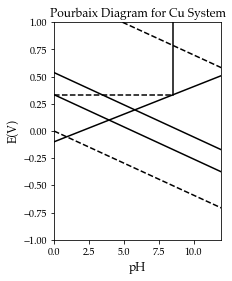

In [160]:
fig = plt.figure(figsize = (3,4))

#Axis limits
plt.xlim(-0,12)
plt.ylim(-1,1)

#All of the relevant boundary lines. Everything in this cell up to this point can be copied.
plt.plot(pH,BoundaryHH2, '--', color = 'black')
plt.plot(pH,BoundaryO2H2O, '--', color = 'black')
plt.plot(pH,ENCusCu2O, '-', color = 'black') #Cus to Cu20
plt.plot(pH,ECu2Cu2O, '-', color = 'black')
plt.plot(pH,ECu2OCuO, '-', color = 'black')
# plt.axhline(-0.52,xmax= .33, color = 'black', linestyle =  '--') #Cu -> Cu+
plt.axhline(0.33,xmax= .708, color = 'black', linestyle =  '--') #Cu+ -> Cu2+
plt.axvline(pHcu2cuo,ymin= .665, color = 'black') #Cu2+ -> CuO


#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Pourbaix Diagram for Cu System')
plt.xlabel('pH', fontsize = '12')
plt.ylabel('E(V)', fontsize = '12')